# ATT&CK真实情况分析报告

本报告结合真实数据对ATT&CK的技术矩阵情况和APT29评测进行数据统计分析

In [1]:
from attackcti import attack_client
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('max_colwidth',3000)
pd.set_option('display.max_rows', None)
pd.set_option('precision',2) 

lift = attack_client()
all_techniques= lift.get_techniques(stix_format=False)

## ATT&CK矩阵数量

ATT&CK一共有535个技术矩阵，每个技术矩阵都是一个攻防检测点。

In [2]:
techniques_normalized = pd.json_normalize(all_techniques)
techniques = techniques_normalized.reindex( \
    ['matrix','platform','tactic','technique','technique_id','data_sources'], axis=1)
techniques.shape[0]

535

## ATT&CK的技术矩阵涉及平台分类

ATT&CK现按平台分为windows、linux、macos、office365、saas共5类技术矩阵，其中windows平台涉及222个技术矩阵。

附:柱状统计图

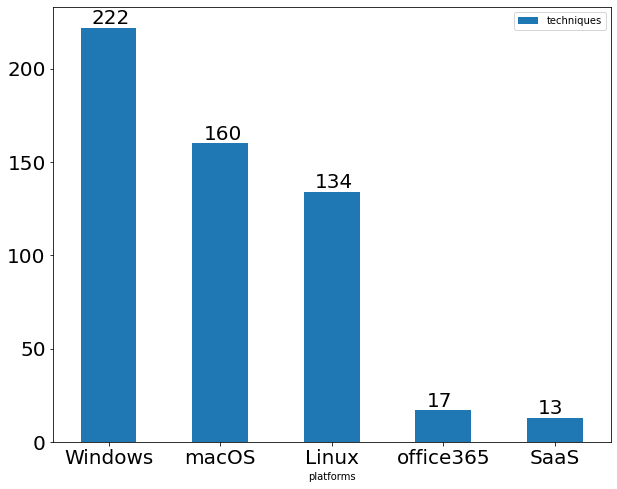

In [3]:
platform = {'Windows':'Windows',
            'Linux':'Linux',
            'macOS':'macOS',
            'office365':'Office 365',
            'SaaS':'SaaS'}

counts_list = []
for (data_key,data_str) in platform.items():
    counts_df =  techniques[ (techniques['platform'].apply(str).str.contains(data_str)) ]
    counts_list.append( ( data_key, counts_df.shape[0] ) )

platforms_df = pd.DataFrame( counts_list ).sort_values(1,ascending=False)
platforms_df = platforms_df.rename(columns={0:'platforms',1:'techniques'})

ax = platforms_df.plot( kind='bar',figsize=(10,8), fontsize=20 ,x=0, y=1, rot=360 )
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.1 , p.get_height() + 2 ) ,size= 20 )
plt.show()

## ATT&CK检测建议数据源

ATT&CK的每个技术矩阵的检测，都建议了对应的数据源，其中windows平台建议了56种数据源。安全人员可以参考建议的数据源，检测ATT&CK技术矩阵归类的攻击活动。

In [4]:
win_data = techniques[ 
    (techniques['platform'].apply(str).str.contains('Windows')) 
]
win_data = pd.DataFrame(win_data[['technique','data_sources']])
win_data = pd.DataFrame(win_data.explode('data_sources'))
source_data = win_data.groupby(by='data_sources') \
    .count() \
    .sort_values(by='technique',ascending=True)
source_data.reset_index(inplace=True) 
source_data.shape[0]

56

### 56个数据源可以对应检测出不同的技术矩阵。
1. Process monitoring （进程监控）
2. Process command-line parameters （进程命令参数）
3. File monitoring （文件读写监控）
4. API monitoring （API调用监控）
5. Process use of network （进程网络关联）
6. Windows Registry （Windows注册表）
7. Packet capture （本机抓包）
8. Netflow/Enclave netflow （网络流量）
9. Windows event logs （windows事件日志）
10. Authentication logs （身份认证日志）
11. Network protocol analysis （网络协议分析）
12. DLL monitoring （DLL加载监控）
13. Binary file metadata （二进制文件元数据）
14. Loaded DLLs （已加载dll文件）
15. SSL/TLS inspection （SSL/TLS检查）
16. Azure activity logs （Azure活动日志）
17. PowerShell logs （Powershell日志）
18. Network intrusion detection system （网络入侵检测系统）
19. Malware reverse engineering （病毒逆向工程）
20. AWS CloudTrail logs （AWS云日志）
21. Anti-virus （杀毒软件）
22. Network device logs （网络设备日志）
23. Application logs （程序日志）
24. Kernel drivers （驱动文件）
25. Stackdriver logs （Stackdriver日志）
26. System calls （系统调用）
27. Data loss prevention （数据泄漏防护）
28. Web proxy （网页代理）
29. Email gateway （邮件网关）
30. Office 365 account logs （Office365账户日志）
31. Host network interface （主机网络接口）
32. User interface （用户接口）
33. Web logs （网页日志）
34. Mail server （邮件服务器）
35. Services （服务）
36. Windows Error Reporting （Windows错误报告）
37. Web application firewall logs （网页防火墙日志）
38. BIOS （主板系统）
39. Third-party application logs （第三方程序日志）
40. MBR （磁盘主引导记录）
41. DNS records （DNS记录）
42. Detonation chamber （引爆作业）
43. Office 365 trace logs （Office365跟踪日志）
44. Sensor health and status （传感器健康状态）
45. Component firmware （固件组件）
46. VBR （卷引导记录）
47. Access tokens （访问令牌）
48. Environment variable （环境变量）
49. Asset management （资产管理平台）
50. EFI （可扩展固件接口）
51. Named Pipes （命名管道）
52. Disk forensics （磁盘取证）
53. WMI Objects （WMI对象）
54. Browser extensions （浏览器扩展）
55. Digital certificate logs （数字证书日志）
56. OAuth audit logs （OAuth审计日志）


### 附：56个检测数据源对应的技术矩阵数横向柱状统计

可以看到排名靠前的进程监控、进程命令参数、文件读写监控、API调用监控、进程网络关联等这些EDR类产品的重点关注数据。

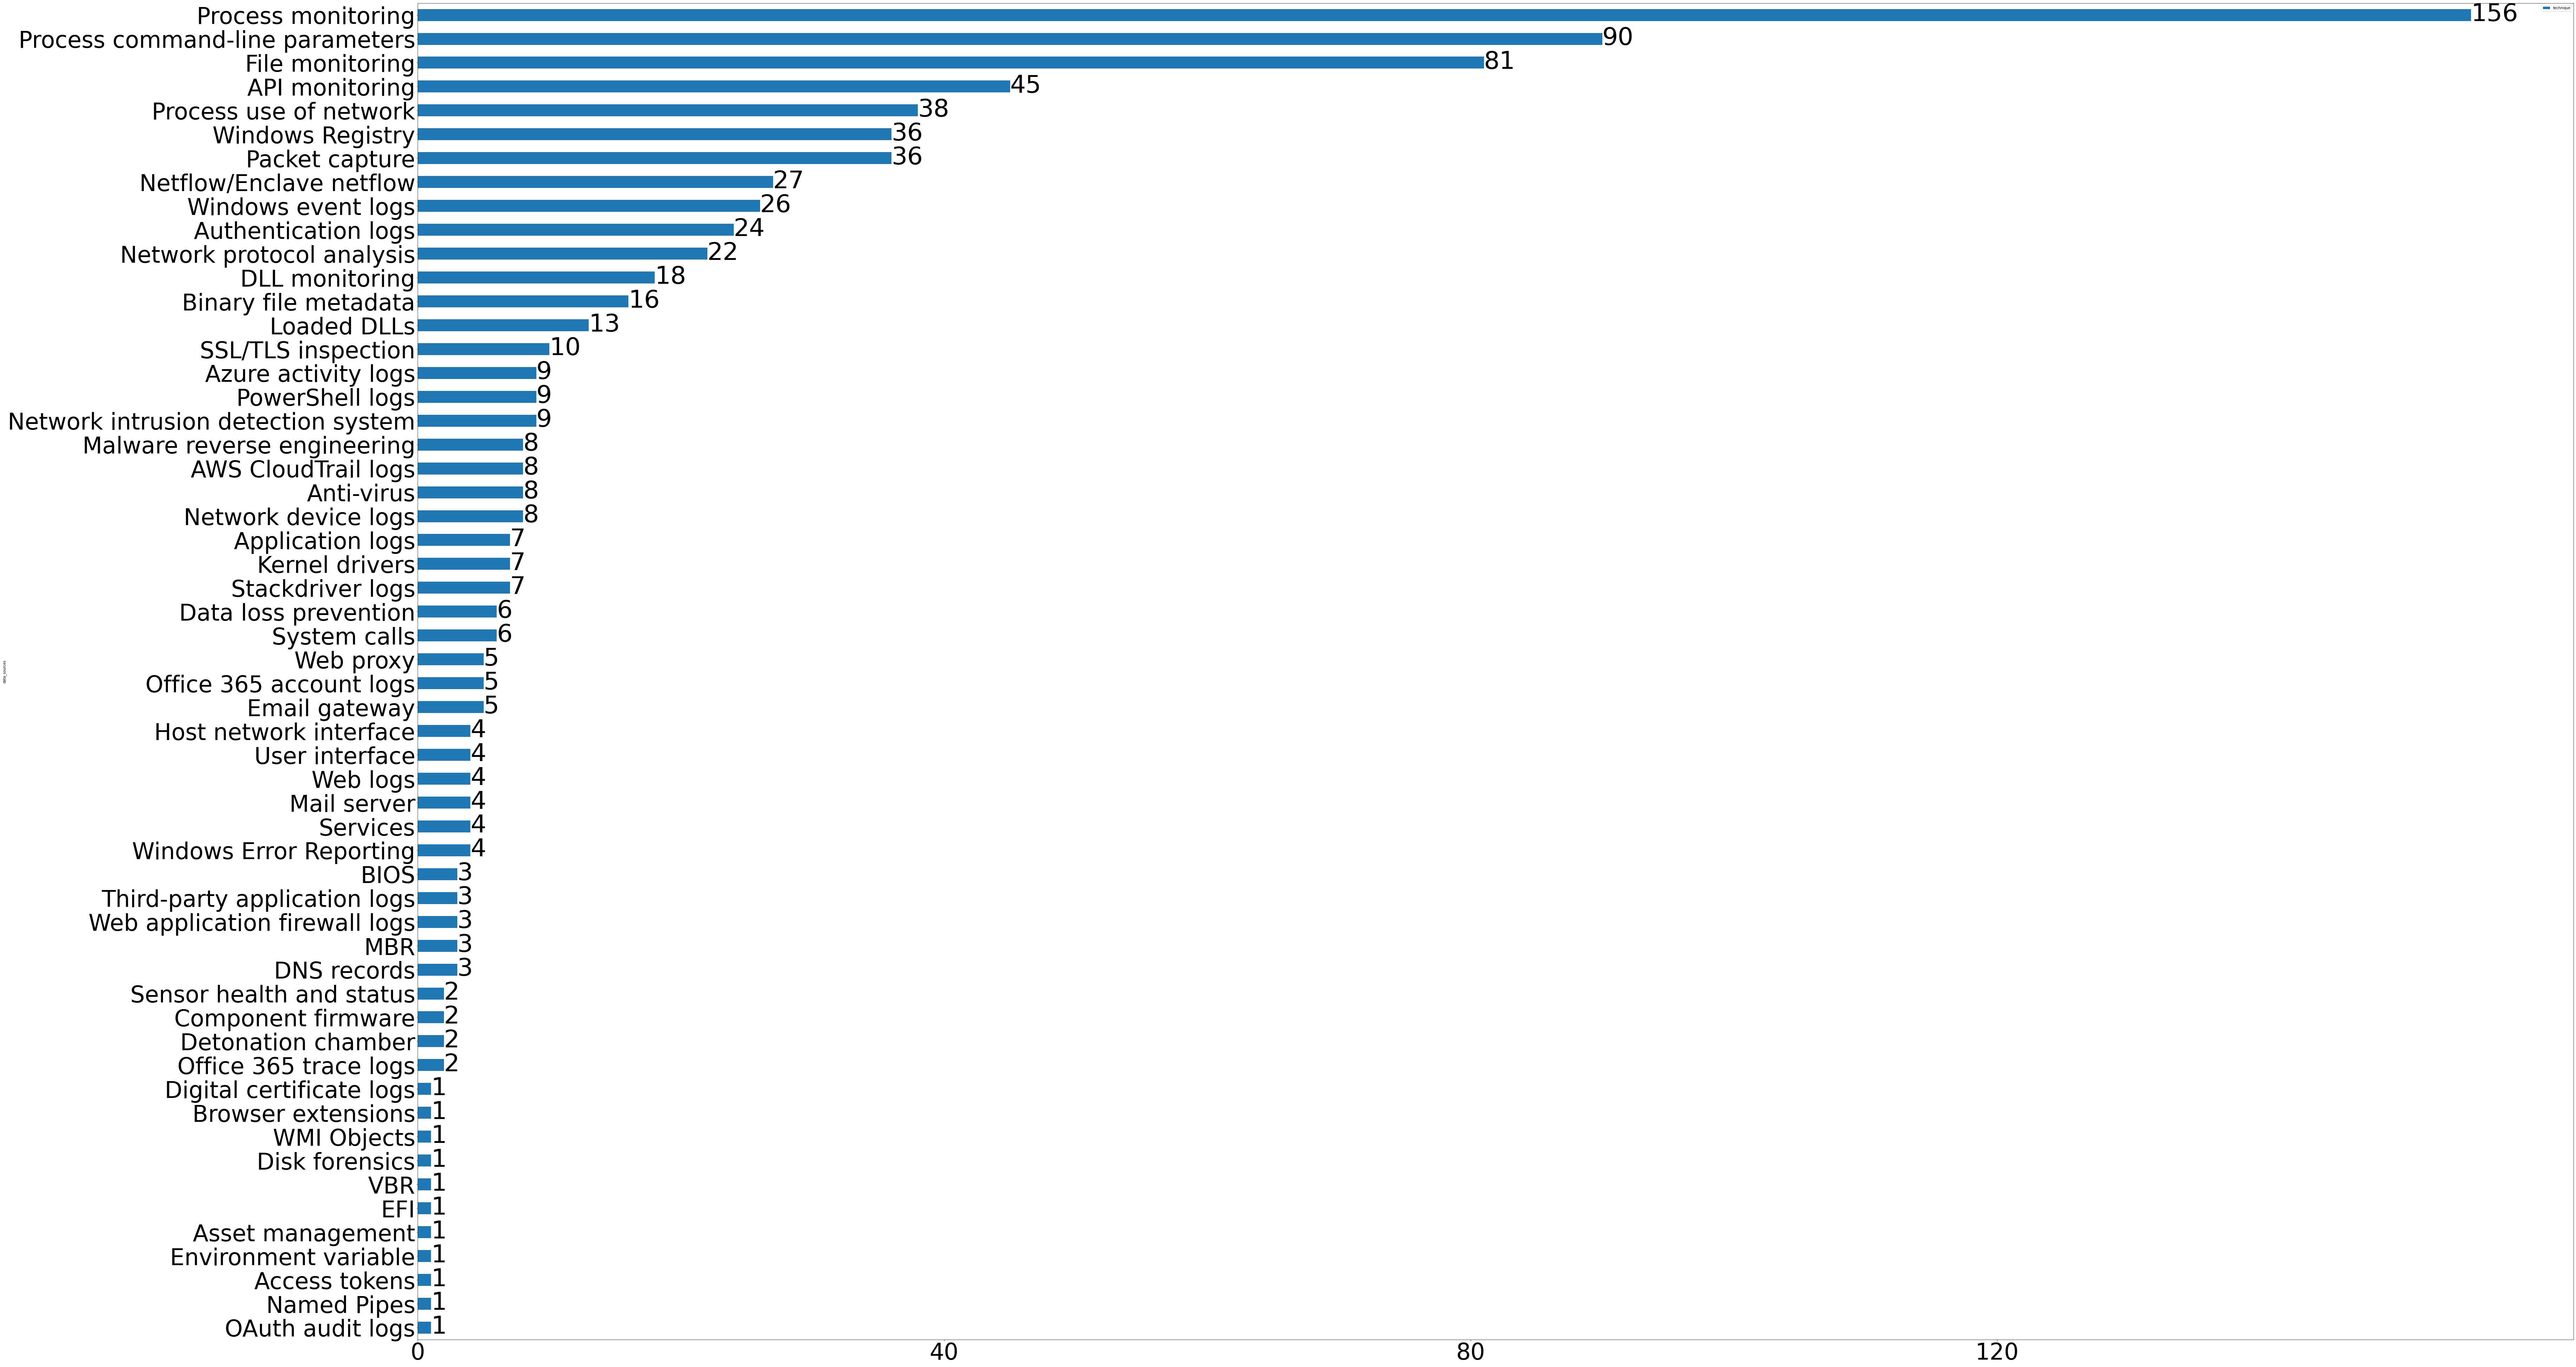

In [5]:
tlist = source_data['data_sources'].tolist()
ax = source_data.plot(kind='barh',figsize=(110,70),x=0, y=1, fontsize=65)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y(), str(i.get_width()), fontsize=70)
my_x_ticks = np.arange(0, 160, 40)
plt.xticks(my_x_ticks)
plt.show()

## ATT&CK的APT29攻击模拟评估

此次评估一共有21家安全厂商参与，评估数据公开透明，非常适合安全人员分析研究安全厂商的真实能力。

数据来源：
https://attackevals.mitre.org


In [6]:
import json,glob,os

files =[]
for infile in sorted(glob.glob(os.path.join('data', '*json'))):
   files.append(infile)
print(len(files))
files

21


['data/Bitdefender.1.APT29.1_Results.json',
 'data/CrowdStrike.1.APT29.1_Results.json',
 'data/Cybereason.1.APT29.1_Results.json',
 'data/Cycraft.1.APT29.1_Results.json',
 'data/Cylance.1.APT29.1_Results.json',
 'data/Elastic.1.APT29.1_Results.json',
 'data/F-Secure.1.APT29.1_Results.json',
 'data/FireEye.1.APT29.1_Results.json',
 'data/GoSecure.1.APT29.1_Results.json',
 'data/HanSight.1.APT29.1_Results.json',
 'data/Kaspersky.1.APT29.1_Results.json',
 'data/Malwarebytes.1.APT29.1_Results.json',
 'data/McAfee.1.APT29.1_Results.json',
 'data/Microsoft.1.APT29.1_Results.json',
 'data/PaloAltoNetworks.1.APT29.1_Results.json',
 'data/ReaQta.1.APT29.1_Results.json',
 'data/Secureworks.1.APT29.1_Results.json',
 'data/SentinelOne.1.APT29.1_Results.json',
 'data/Symantec.1.APT29.1_Results.json',
 'data/TrendMicro.1.APT29.1_Results.json',
 'data/VMware.1.APT29.1_Results.json']

In [7]:
from natsort import index_natsorted, order_by_index
import copy

all_data = {}

for f_path in files:
    vendor = f_path.split(os.sep, 2)[-1]
    vendor = vendor.split('.', 1)[0]
    with open(f_path, 'r', encoding='utf-8') as infile:
        data=infile.read()
        obj = json.loads(data)['Techniques']
        df = pd.json_normalize(obj,'Steps', ['TechniqueId','TechniqueName', 'Tactics'])
        all_data.update({ vendor: df }) 

## APT29评估方法

此次评估一共有140个攻击动作步骤，每个步骤对应不同的战术Tactics和技术Technique。

* 战术Tactics （攻击动作的意图分类）
* 技术Technique （攻击动作的技术分类）
* 标准Criteria （攻击动作的详细过程）
* 程序Procedure （攻击动作的技术细节）


In [8]:
test_data = copy.deepcopy(all_data)    
test_data = test_data.values()
test_data = list(test_data)[0]
eval_step = test_data.reindex(index=order_by_index(test_data.index, 
                         index_natsorted(test_data['SubStep'])
                        ))
eval_step.reset_index(drop=True, inplace=True)   
eval_step['TacticsName']=eval_step['Tactics'].apply(lambda x: x[0]['TacticName']) 
eval_step = eval_step.reindex(['SubStep','TacticsName','TechniqueName','Criteria','Procedure'], axis=1) 
eval_step

,SubStep,TacticsName,TechniqueName,Criteria,Procedure
0,1.A.1,Execution,User Execution,The rcs.3aka3.doc process spawning from explorer.exe,User Pam executed payload rcs.3aka3.doc
1,1.A.2,Defense Evasion,Masquerading,Evidence of the right-to-left override character (U+202E) in the rcs.3aka.doc process ​OR the original filename (cod.3aka.scr),Used unicode right-to-left override (RTLO) character to obfuscate file name rcs.3aka3.doc (originally cod.3aka.scr)
2,1.A.3,Command and Control,Uncommonly Used Port,Established network channel over port 1234,Established C2 channel (192.168.0.5) via rcs.3aka3.doc payload over TCP port 1234
3,1.A.4,Command and Control,Standard Cryptographic Protocol,Evidence that the network data sent over the C2 channel is encrypted,Used RC4 stream cipher to encrypt C2 (192.168.0.5) traffic
4,1.B.1,Execution,Command-Line Interface,cmd.exe spawning from the rcs.3aka3.doc​ process,Spawned interactive cmd.exe
5,1.B.2,Execution,PowerShell,powershell.exe spawning from cmd.exe,Spawned interactive powershell.exe
6,2.A.1,Discovery,File and Directory Discovery,powershell.exe executing (Get-)ChildItem,Searched filesystem for document and media files using PowerShell
7,2.A.2,Collection,Automated Collection,powershell.exe executing (Get-)ChildItem,Scripted search of filesystem for document and media files using PowerShell
8,2.A.3,Collection,Data from Local System,powershell.exe reading files in C:\Users\Pam\,Recursively collected files found in C:\Users\Pam\ using PowerShell
9,2.A.4,Exfiltration,Data Compressed,powershell.exe executing Compress-Archive,Compressed and stored files into ZIP (Draft.zip) using PowerShell


## 关于如何评测APT29模拟攻击的检出数据

APT29攻击的测试环境工具已经完全开源 https://github.com/mitre-attack/attack-arsenal

厂商的检出结果公开透明，MITRE ATT&CK官方的评估标准颗粒度较细，检出结果类型分主要检测类型和修饰检测类型。修饰检测类型相当于附加描叙,可以算是加分项。

由于MITRE ATT&CK官方只给出统计数据，而各方的评分标准不统一，导致各路分析师和厂商对应检测成绩的评定过于两极化，同时如果过多关注检测类型组合情况反而复杂化了评估，反应不出厂商真实水平，所以我以一线技术人员的理解给出了评估方法。

### 主要按如下方法评估厂商

* 非None类型都可认为是检出情况，可统计技术矩阵覆盖度。
* Telemetry和MSSP两种类型告警进行统计，可统计需要分析师运营跟进的模糊告警数据。
* General、Tactic、Technique三种类型进行统计，可统计明确的恶意告警数据。
* 按主要检测类型的价值梯度进行打分，以检出结果的运营价值得出厂商排名。

### 主要检测类型
* None 
（无检出）
* Telemetry
 （遥测型检出，仅作为打点数据，无上下文参考或明确恶意标记的告警）
* MSSP 
（安全运营型检出，需要分析师进一步关联分析判断才能确认威胁的告警）
* General 
（通用型检出，标记为通用的恶意行为告警，无准确的技战术分类）
* Tactic 
（战术型检出，向分析师提供了攻击动作潜在意图信息的告警）
* Technique 
（技术型检出，向分析师提供了攻击动作的详细技战术信息的告警）

### 修饰检测类型
* Alert （告警）
* Correlated （相关）
* Delayed （延迟）
* Host Interrogation （主机响应）
* Residual Artifact （残留工件）
* Configuration Change （配置更改）
* Innovative （创新检测）

### 此次APT29评估一共涉及了ATT&CK共58个技术矩阵，每个技术矩阵涉及多个模拟攻击动作步骤。 
附：统计列表

In [9]:
tech_count = eval_step.reindex(['TechniqueName','SubStep'],axis=1)
tech_count = tech_count.groupby(['TechniqueName']).count(). \
    sort_values(by='SubStep',ascending=False)
tech_count.reset_index(inplace=True)  
tech_count
#tech_count.to_csv('tech_count.csv',encoding='utf_8_sig')

,TechniqueName,SubStep
0,File Deletion,10
1,Remote File Copy,7
2,Process Discovery,6
3,PowerShell,5
4,System Owner/User Discovery,5
5,File and Directory Discovery,5
6,Execution through API,4
7,System Information Discovery,4
8,Credential Dumping,4
9,Data Compressed,4


### 挑一个厂商的File Deletion技术矩阵检出日志查看一下检出类型

检出类型有Telemetry类型，有MSSP类型，也有Technique类型，以及具有争议的N/A无类型检出。

In [10]:
from IPython.display import JSON
import warnings
warnings.filterwarnings('ignore')

cy = all_data['Cycraft'][ 
    (all_data['Cycraft']['TechniqueName']=='File Deletion') 
]

print(list(all_data.keys()))
JSON(cy['Detections'].to_json(),expanded=True)

['Bitdefender', 'CrowdStrike', 'Cybereason', 'Cycraft', 'Cylance', 'Elastic', 'F-Secure', 'FireEye', 'GoSecure', 'HanSight', 'Kaspersky', 'Malwarebytes', 'McAfee', 'Microsoft', 'PaloAltoNetworks', 'ReaQta', 'Secureworks', 'SentinelOne', 'Symantec', 'TrendMicro', 'VMware']


<IPython.core.display.JSON object>

## APT29评估检出覆盖度统计

对应140个步骤的检测结果，在不考虑检测类型即准确性和误报的情况下,仅对厂商有检出结果的技术矩阵覆盖度进行统计排名。

结论：
绝大多数厂商都已经覆盖了100个以上攻击动作步骤的检出，说明各厂商产品对ATT&CK技术矩阵分类的攻击动作相关告警跟进力度都很大。

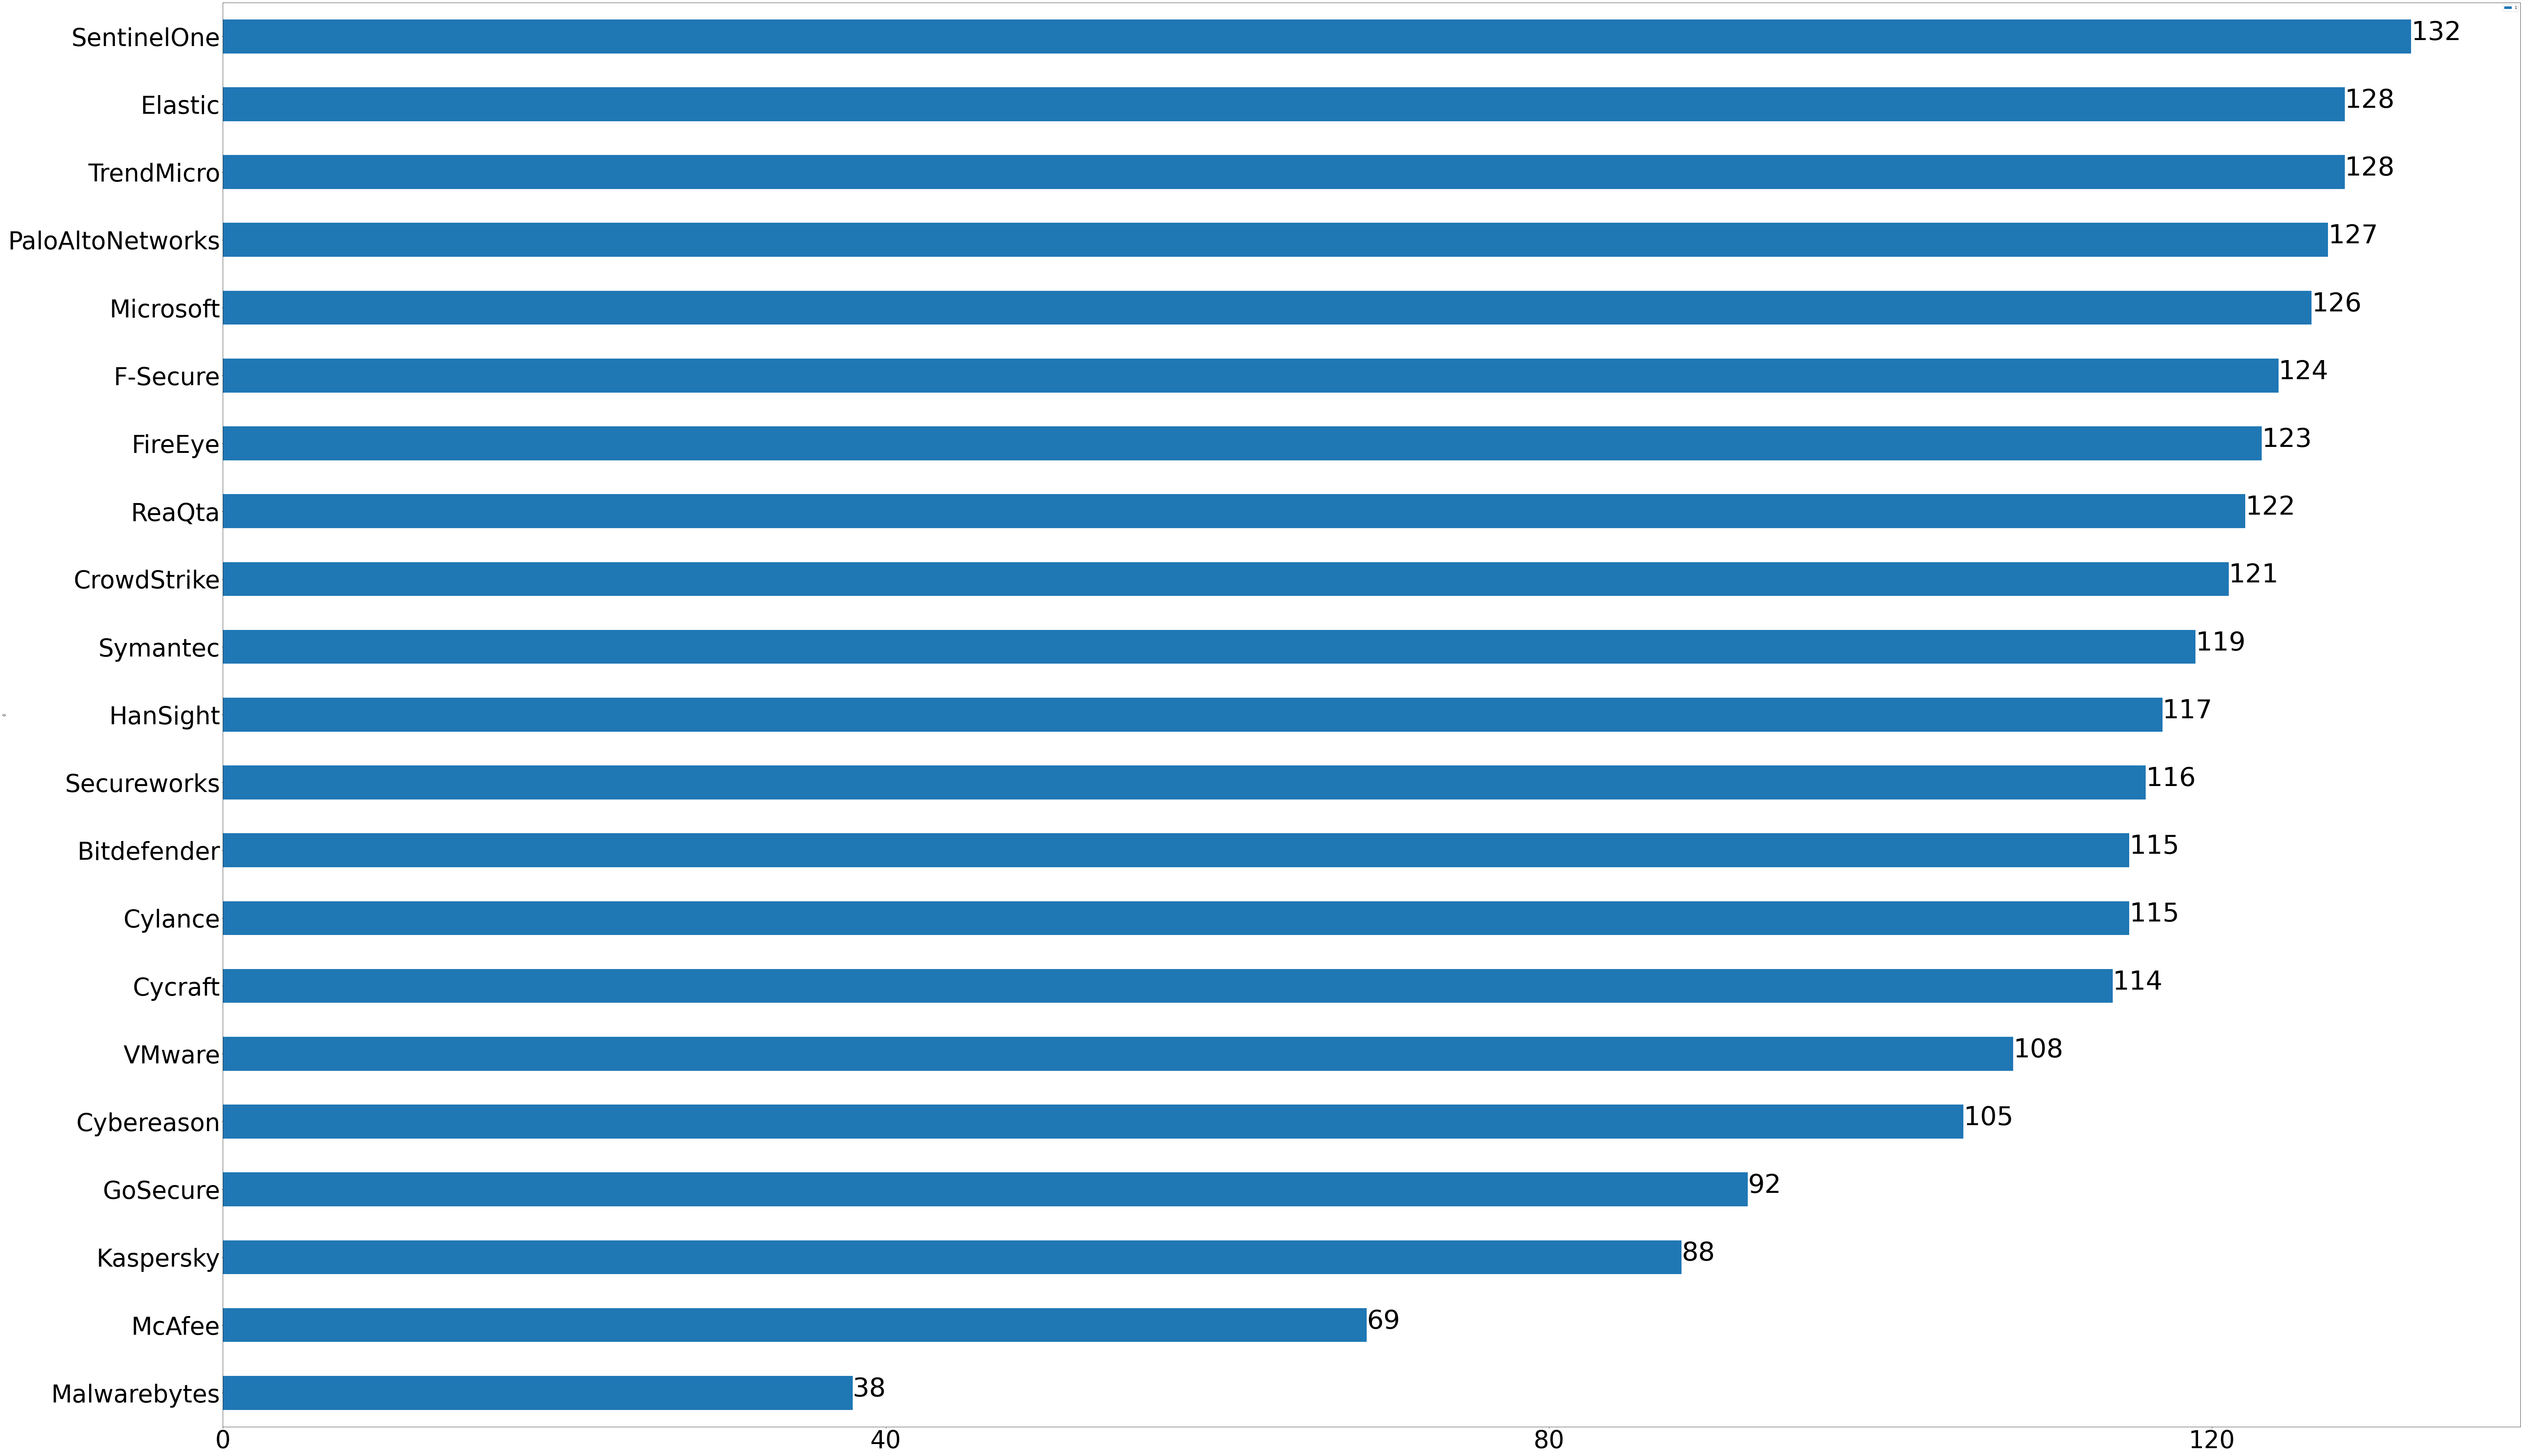

In [11]:
def check_all_Detection():  
    
    flag_list = []
    flag_data = copy.deepcopy(all_data)
    
    def check_deep_Detection(DetectionNote):
        Detection = 0
        for xl in DetectionNote:
            if xl['DetectionType']=='None':
                Detection = 0
            else:
                Detection = +1
        return Detection

    for i,d in flag_data.items():
        d['Detections'] =  d['Detections'].apply(lambda x: check_deep_Detection(x)) 
        d_count =d['Detections'].sum()       
        flag_list.append( (i,d_count) )
    return flag_list

flag_list =check_all_Detection()
flag_df = pd.DataFrame( flag_list ).sort_values(1,ascending=True)
ax = flag_df.plot(kind='barh',figsize=(110,70),x=0, y=1, fontsize=65)
for i in ax.patches:
    #ax.text(i.get_width(), i.get_y() + 0.2, '{:.0%}'.format(i.get_width()/140), fontsize=70)
    ax.text(i.get_width(), i.get_y() + 0.2, i.get_width() , fontsize=70)
my_x_ticks = np.arange(0, 160, 40)
plt.xticks(my_x_ticks)
plt.show()

## APT29评估遥测和安全运营类型检出数据统计

厂商的遥测运营能力统计，只统计每个攻击动作步骤中厂商检出的Telemetry和MSSP类型告警数据。

结论：在140个攻击动作步骤检出结果里，厂商的检出数据绝大多数都是遥测运营类数据，这类检出数据都需要分析师进一步关联分析才能确认威胁,可以看出厂商的产品路线都是在走分析师参与的重运营路线。


In [12]:
def check_custom_Detection( check_list ):    
    flag_list = []
    flag_data = copy.deepcopy(all_data)
    
    def check_deep1_Detection(DetectionNote):
        Detection = 0
        for xl in DetectionNote:
            for cl in check_list:
                if xl['DetectionType']== cl:
                    Detection = +1
        return Detection

    for i,d in flag_data.items():
        d['Detections'] =  d['Detections'].apply(lambda x: check_deep1_Detection(x)) 
        d_count =d['Detections'].sum()   
        flag_list.append( (i,d_count) )
        
    tel_df = pd.DataFrame( flag_list ).sort_values(1,ascending=True).round(1)
    ax = tel_df.plot(kind='barh',figsize=(110,70),x=0, y=1, fontsize=65)
    for i in ax.patches:
        ax.text(i.get_width(), i.get_y() + 0.2, i.get_width() , fontsize=70)
    my_x_ticks = np.arange(0, 100, 20)
    plt.xticks(my_x_ticks)
    plt.show()

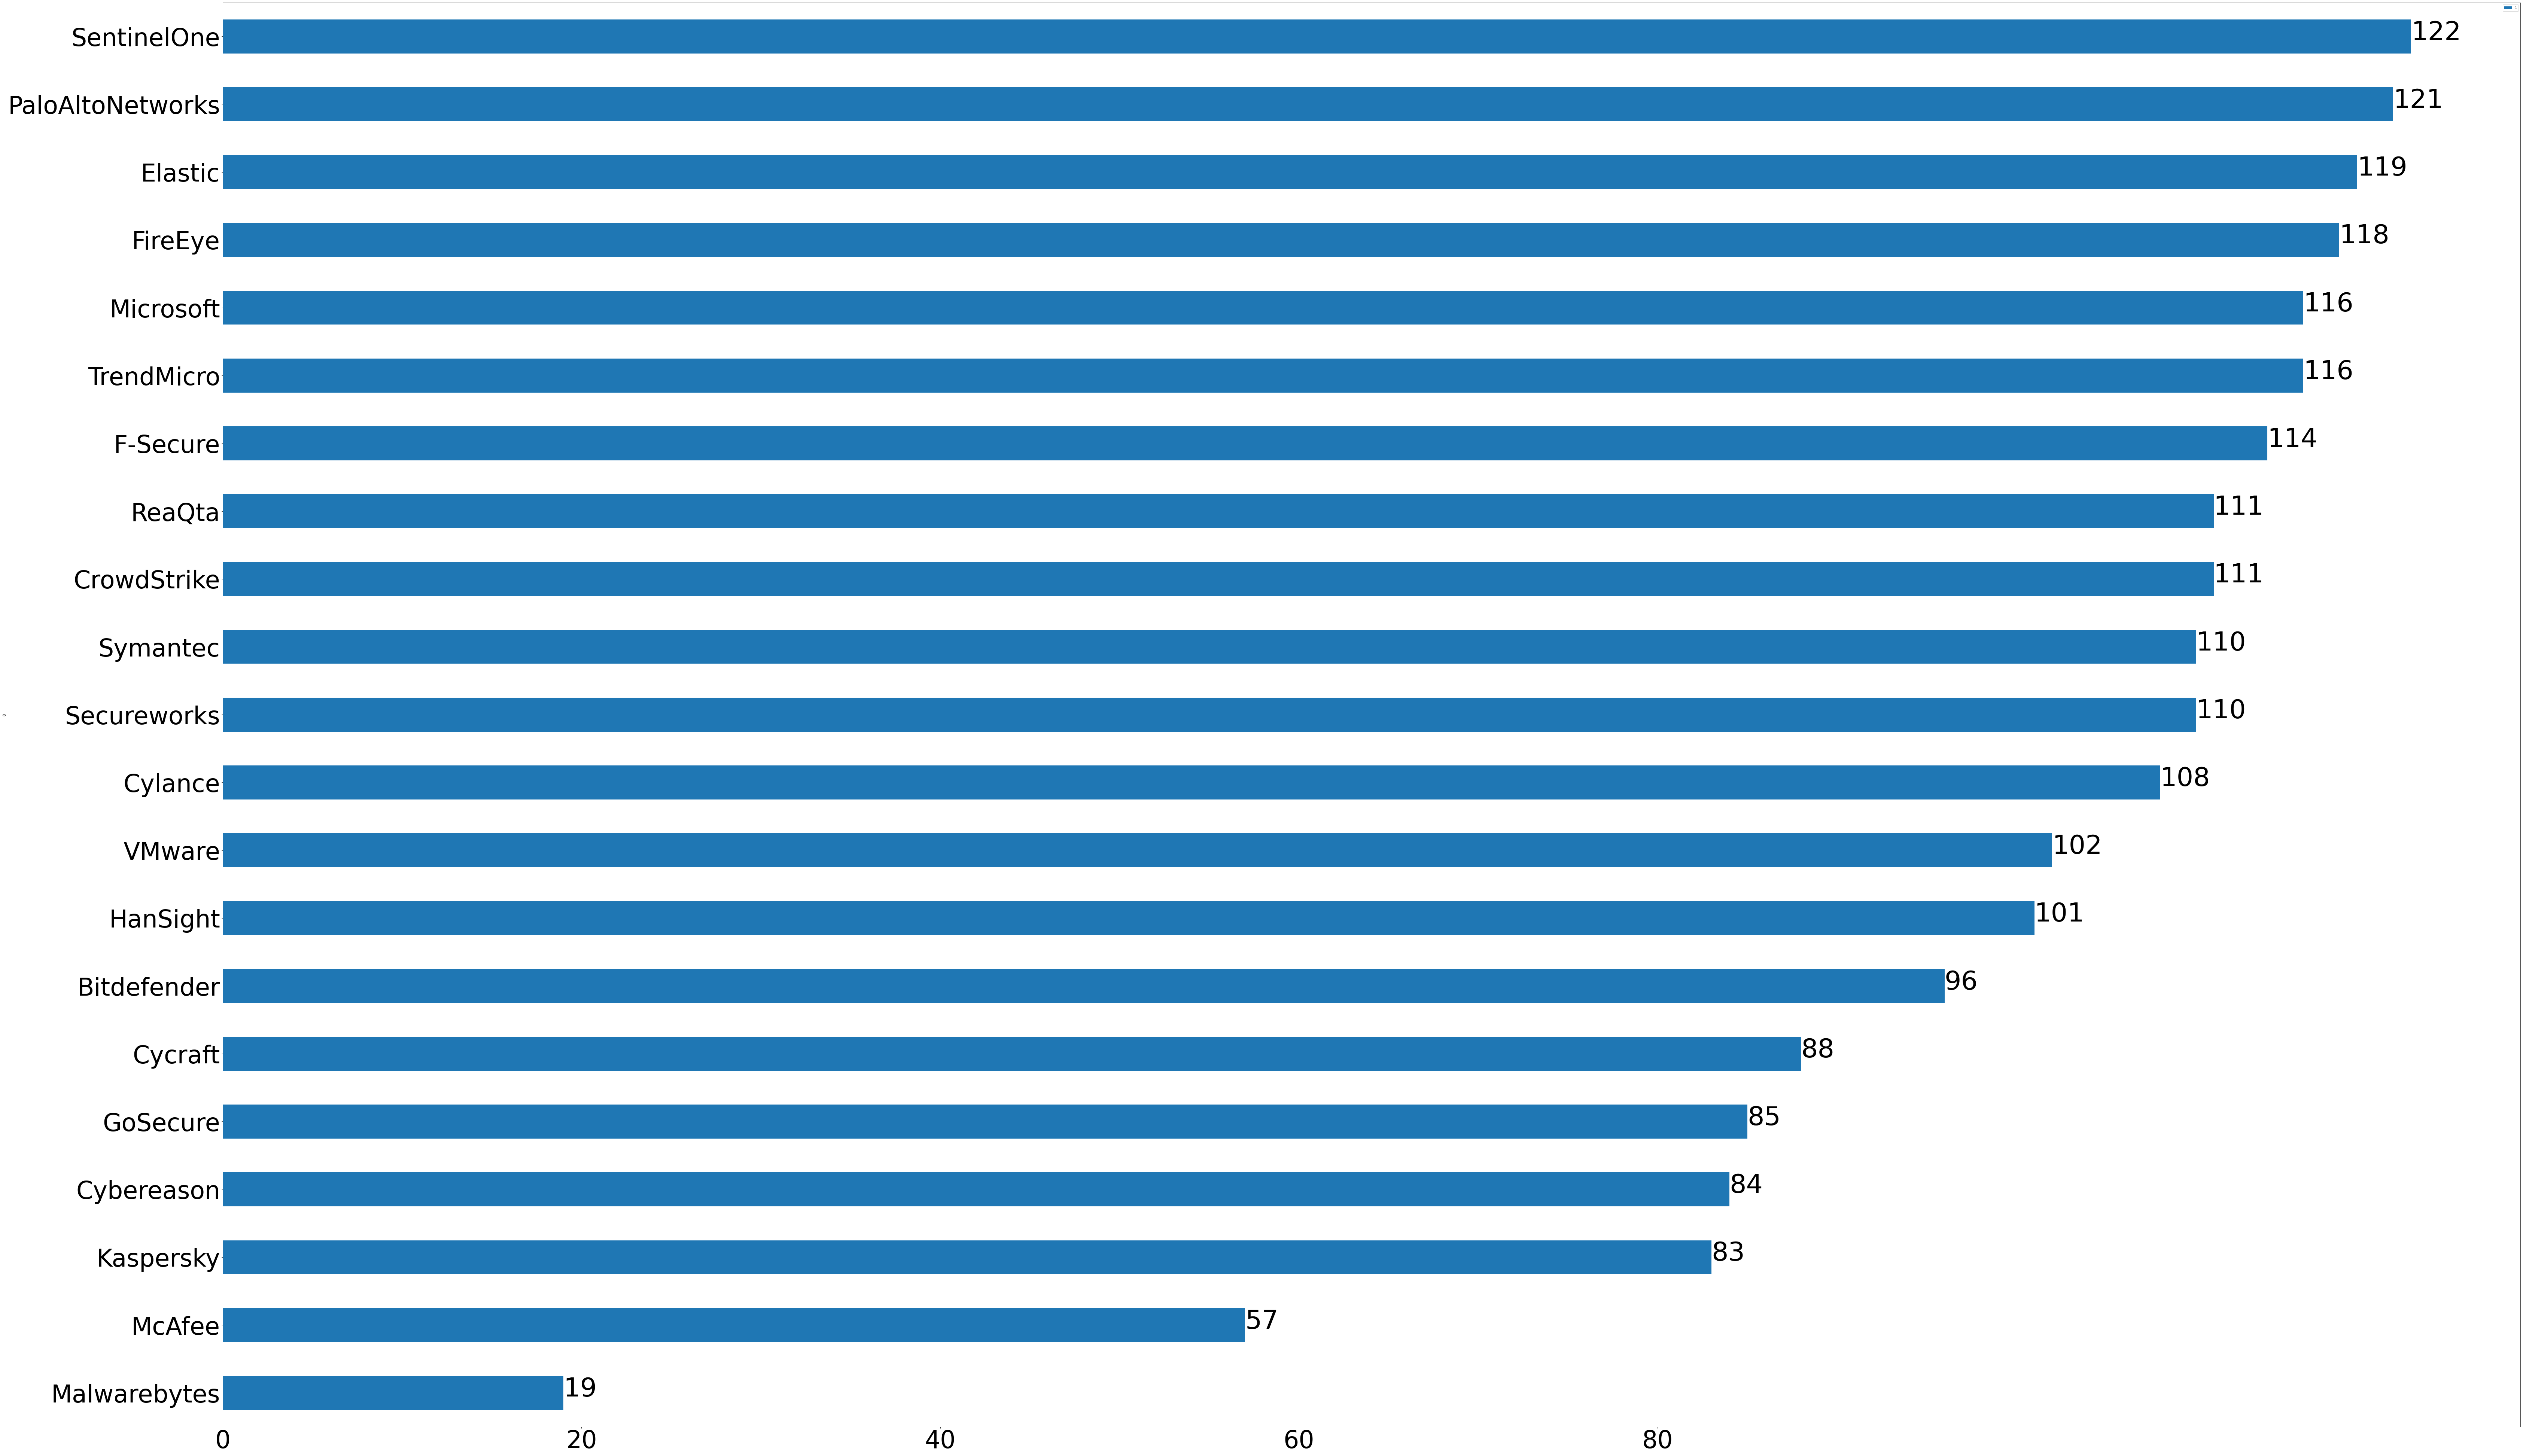

In [13]:
check_custom_Detection(['Telemetry','MSSP'])

## APT29评估厂商的精准检出统计

对General、Technique、Tactic类型的检出数据进行统计。

结论：此类数值并不是越大就代表厂商越牛，仅能反应厂商对部分低误报、低噪点的技术矩阵跟进力度。

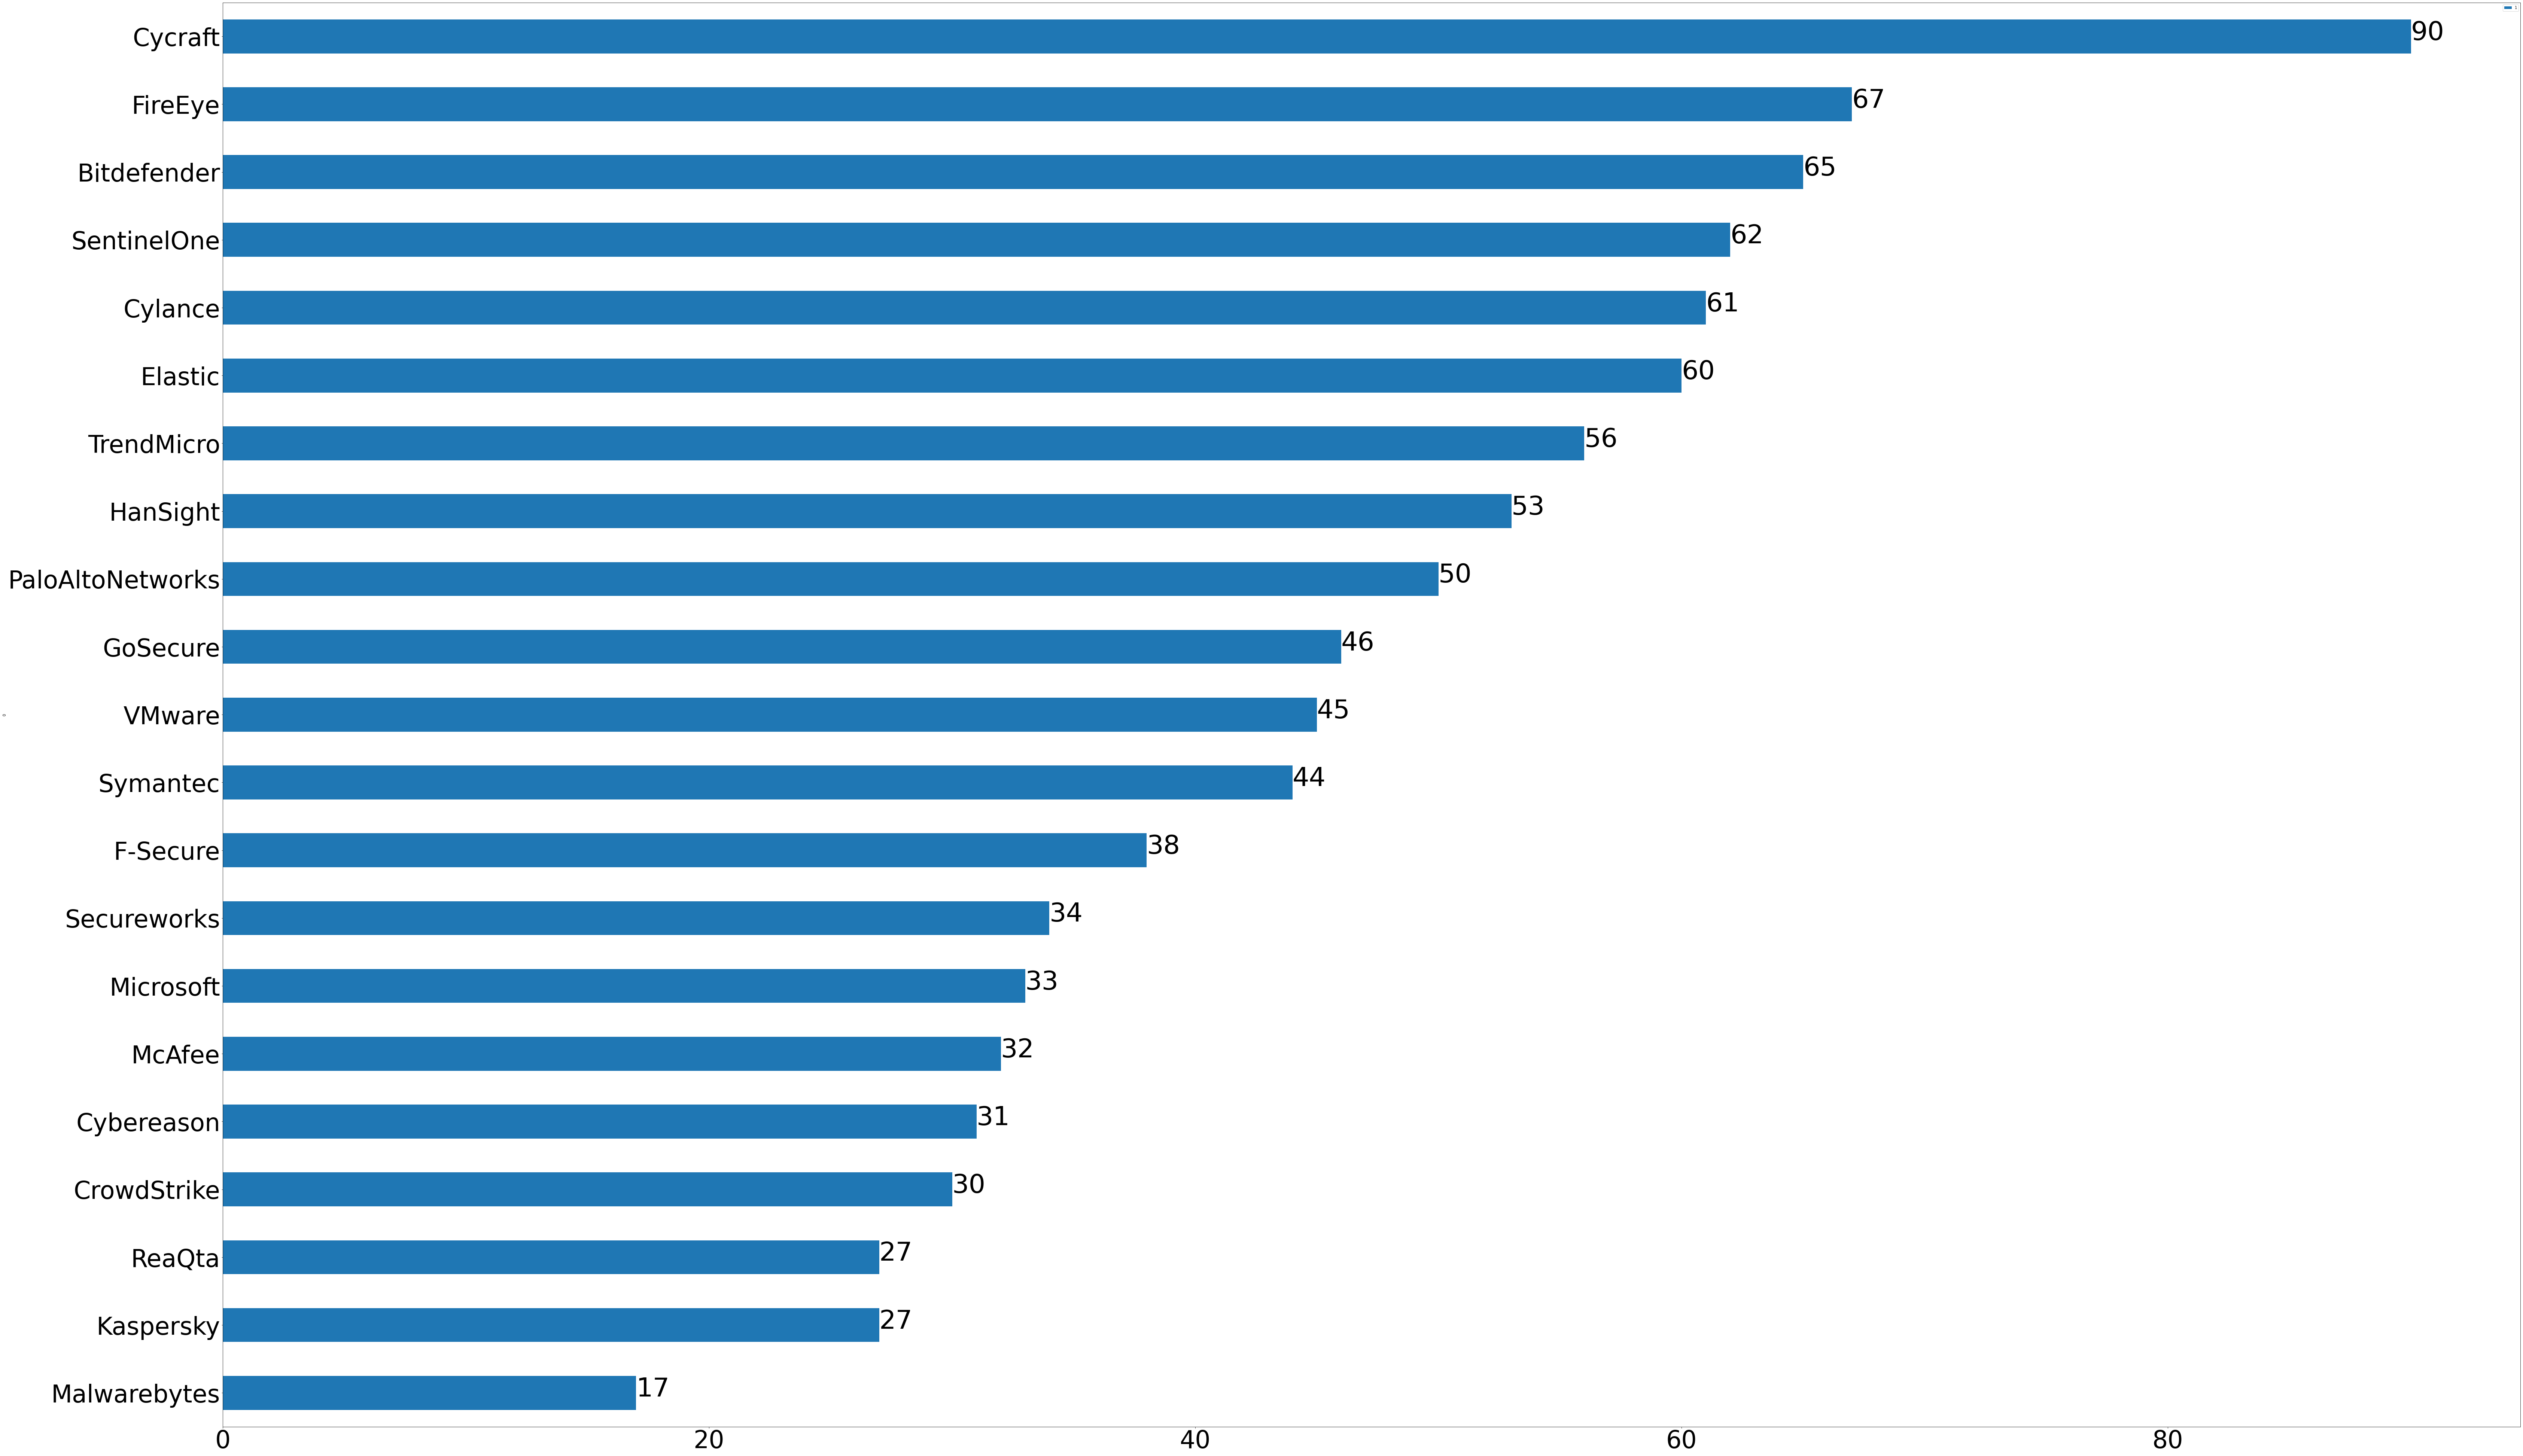

In [14]:
check_custom_Detection(['General','Technique','Tactic'])

## APT29评估厂商按照主要检测类型的价值进行打分排名

打分标准：
* None 无检出 0分
* Telemetry 遥测型检出 0.5分
* MSSP 安全运营型检出 0.6分
* General 通用型检出 0.7分
* Tactic 战术型检出和Technique 技术型检出 均为1分

结论：

60分以上的形成第一梯队，厂商只有微小差距

60分以下至55分形成第二梯队，厂商以1分左右形成梯度差距

55分以下的厂商形成第三梯队，开始完全掉队


In [15]:
def check_flag_Detection():  
    
    flag_list = []
    flag_data = copy.deepcopy(all_data)
    
    def check_deep1_Detection(DetectionNote):
        Detection = 0
        for xl in DetectionNote:
            if xl['DetectionType']=='None':
                Detection = 0
            elif xl['DetectionType']=='N/A':
                Detection = 0
            elif xl['DetectionType']== 'Telemetry':
                Detection = 0.5
            elif xl['DetectionType']== 'MSSP':
                Detection = 0.6
            elif xl['DetectionType']== 'General':
                Detection = 0.7
            elif xl['DetectionType']== ('Tactic' or 'Technique'):
                Detection = 1
        return Detection

    for i,d in flag_data.items():
        d['Detections'] =  d['Detections'].apply(lambda x: check_deep1_Detection(x)) 
        d_count =d['Detections'].sum()   
        flag_list.append( (i,d_count) )
        
    tel_df = pd.DataFrame( flag_list ).sort_values(1,ascending=True).round(1)
    ax = tel_df.plot(kind='barh',figsize=(110,70),x=0, y=1, fontsize=65)
    for i in ax.patches:
        ax.text(i.get_width(), i.get_y() + 0.2, i.get_width() , fontsize=70)
    my_x_ticks = np.arange(0, 100, 20)
    plt.xticks(my_x_ticks)
    plt.show()

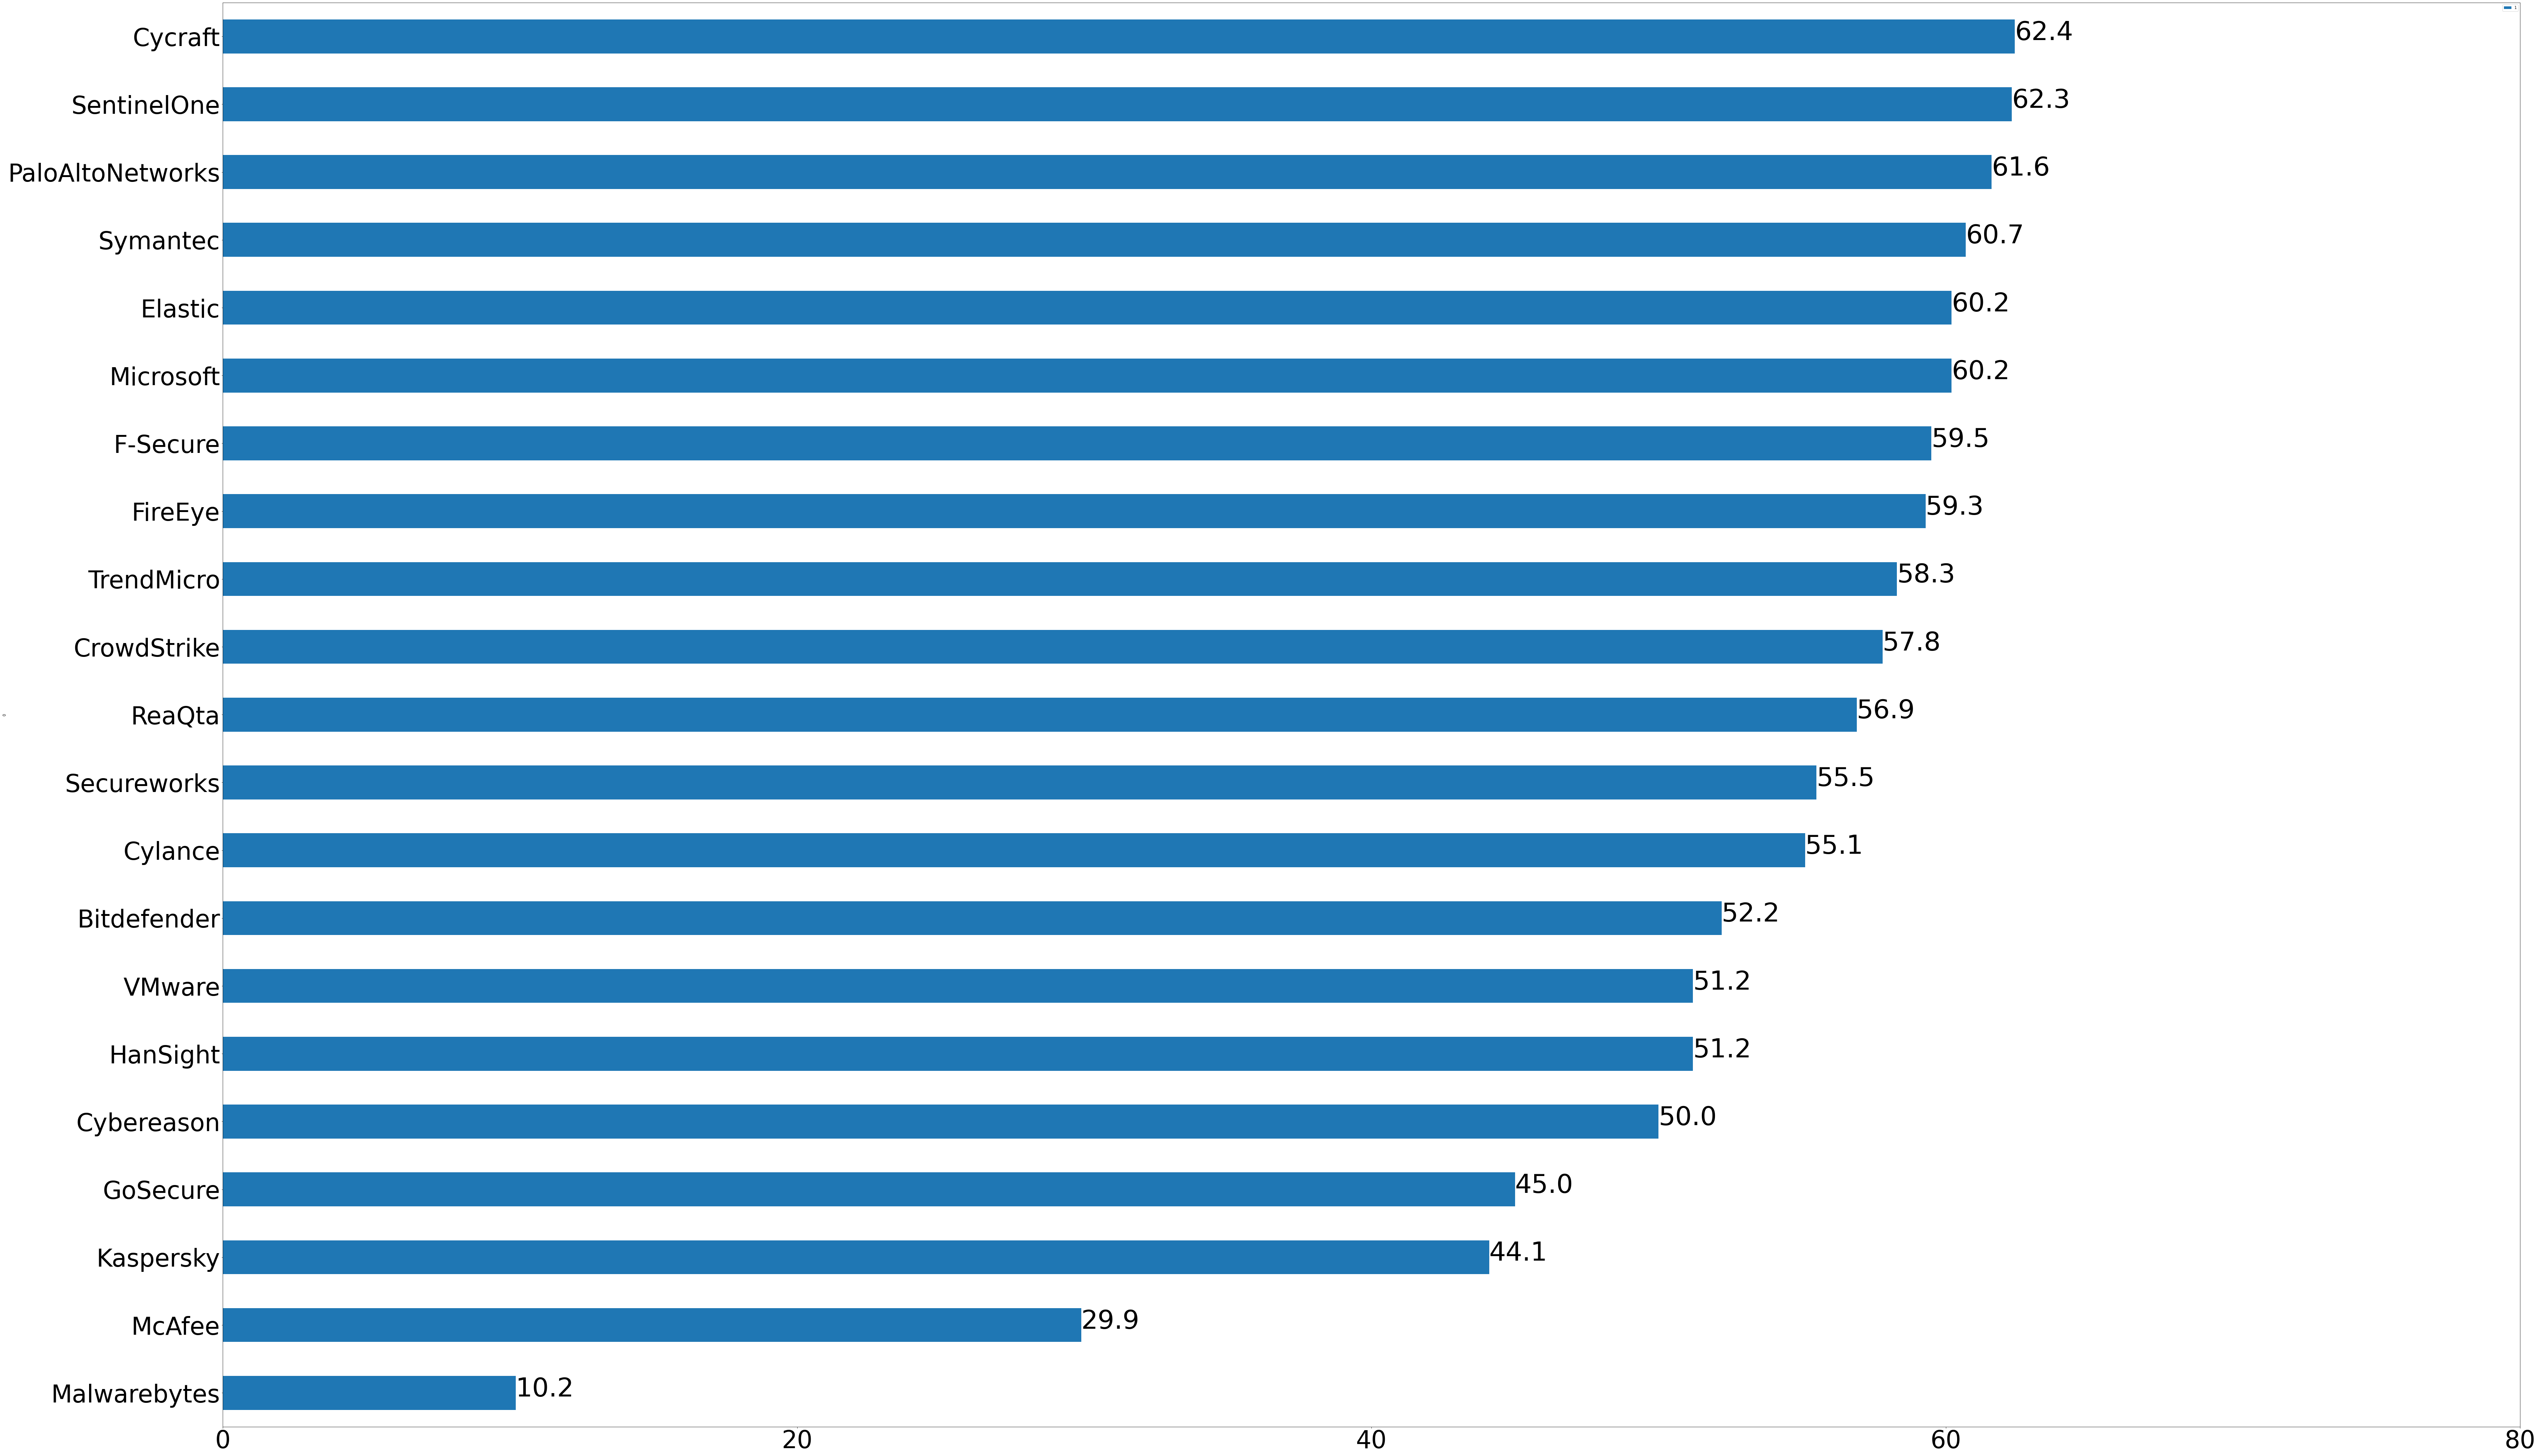

In [16]:
check_flag_Detection()